## Iris Flower DataSet

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
# *  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



The four features of these 3 types of flowers<br>(Iris setosa, Iris versicolor, Iris virginica) are:<br>

1)Sepal Length<br>
2)Sepal Width<br>
3)Petal Length<br>
4)petal Width<br>

We will classify the given flower by using this Four Features

# Step1 - Load the Data:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
#Importing the dataset

iris = pd.read_csv('C:/Users/91956/Desktop/7th sem project/iris.csv')

#iris = pd.read_csv('C:/Users/91956/Desktop/7th sem project/churn.csv');

iris=pd.read_csv("C:/Users/91956/Desktop/7th sem project/iris.csv", header=0)
colomn_name=["sepal_length","sepal_width","petal_length","petal_width","Species"]
iris.columns=colomn_name
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


observation: 150 rows/data points and 5 cols/features

In [32]:
#cols present in dataset

iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

1. Exploratory Data Analysis

In [52]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
#Checking if there is any missing data in the dataset:

iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

# Step 2 – Analyze and visualize the dataset:

In [36]:
# Some basic statistical analysis about the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
#Q) how many datapts for each type of flower?

#types = iris.groupby('species');
#types.count()

#or

iris['Species'].value_counts()

#print(iris.groupby("Species").size())

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Observation: its a balanced data set

# 2-D ScatterPlot

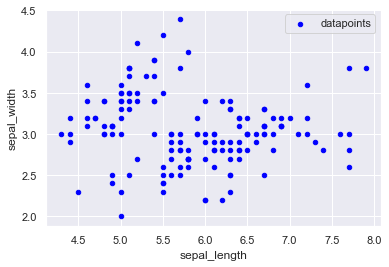

In [38]:
# label, color are optional parameters
iris.plot(x='sepal_length',y='sepal_width',kind='scatter',label='datapoints',color='blue');
plt.show()

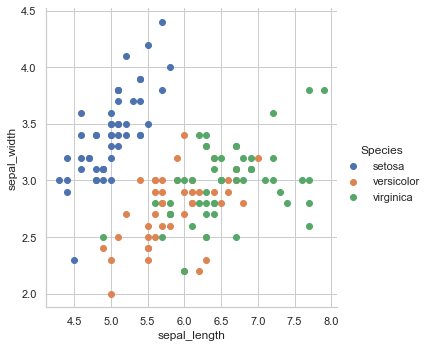

In [39]:
# using seaborn lib to stylize the graph
# sns is seaborn as imported above
sns.set_style("whitegrid");

# hue = 'species' -> color encoding based on 
# distinct species here 3 types so 3 colors

#size -> size of the graph
sns.FacetGrid(iris, hue='Species',height=5) \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend();
plt.show();

Obeservation:<br>
1)Setosa Flowers can be distinguished from this as they dont overlap with other types of flowers.<br>

2)Versicolor and and Virginica flowers cant be distinguished with this features(sepal lenght and width) as they overlapped.<br>

If we draw a line we can classify setosa from these 3 types as they lie left side of the line.

# 3-D Scatter Plots

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?
Ans) as Human can visualize only 3d.
n-D can be visualized through Maths oe of the way is 'Pair-Plot'

## Pair Plots

As we cant visualize N-D we will divide features into all possible pairs and visualize the plot of pairs gives the total idea of the data.<br>

In Our Case We have 4 features:<br>

1)SL - sepal length<br>
2)SW - sepal width<br>
3)PL - petal length<br>
4)PW - petal width<br>

No.of pair plots with these 4 features is: 4C2<br> i.e 6 <br>

(SL,SW),(SL,PL),(PL,SW).....

Note: We use Seaborn Lib to PairPlot


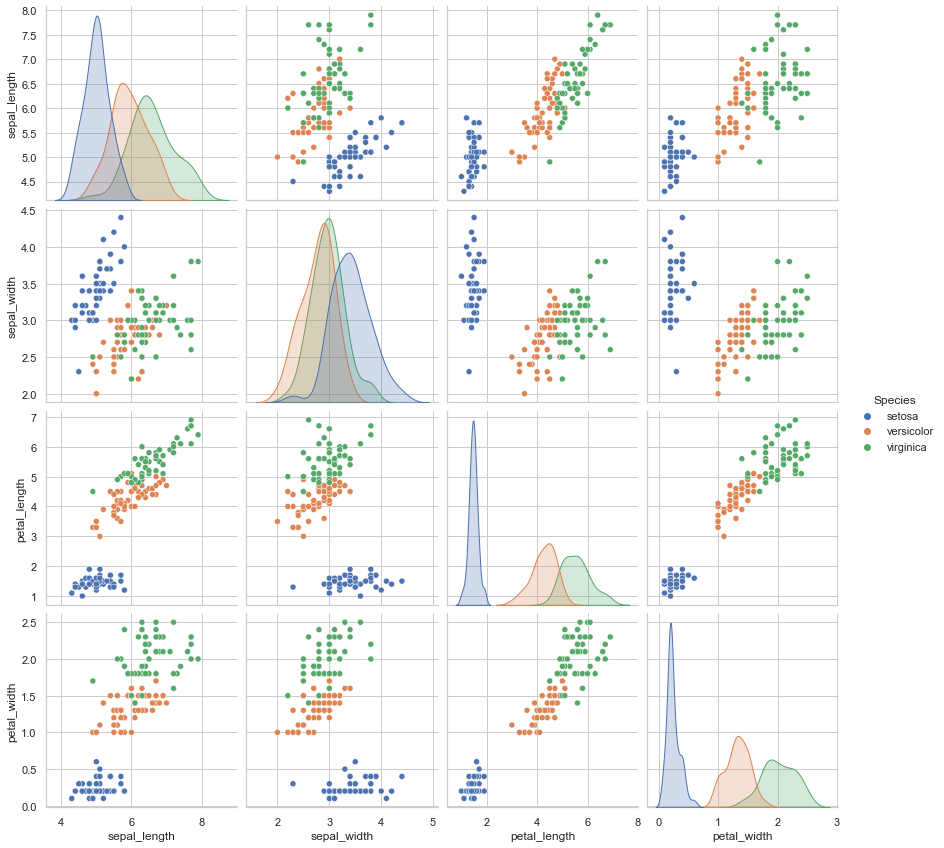

In [40]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue='Species',height=3);
plt.show();

Observation: From the above graphs PW-PL graph is perfect to distinguish between 3 flowers with some compramise, below is the final graph to look clearly

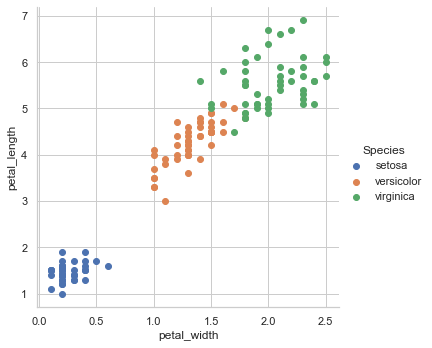

In [41]:
sns.set_style("whitegrid");

# hue = 'species' -> color encoding based on 
# distinct species here 3 types so 3 colors

#size -> size of the graph
sns.FacetGrid(iris, hue='Species',height=5) \
    .map(plt.scatter, 'petal_width','petal_length') \
    .add_legend();
plt.show();

### Disadvantage of Pair Plot

Here in the above case for 4d or 4 features we have 6 plots, Consider 100d or 100 features no of plots will be 100C2 plots.

# Visualizing Covariance Matrix

In [13]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

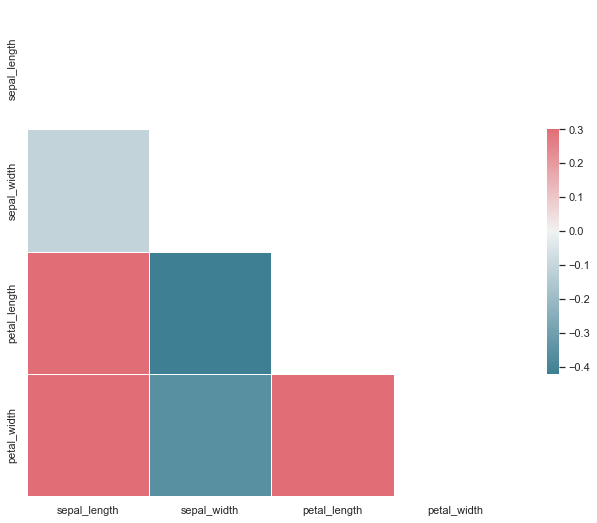

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = iris.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

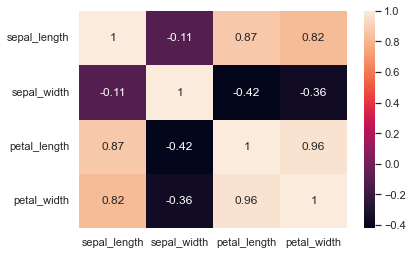

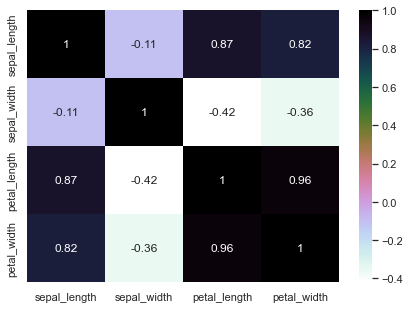

In [42]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

uniform_data = iris.corr()
ax = sns.heatmap(uniform_data, annot = True)

plt.figure(figsize=(7,5))
sns.heatmap(iris.corr(),annot=True, cmap='cubehelix_r')
plt.show()

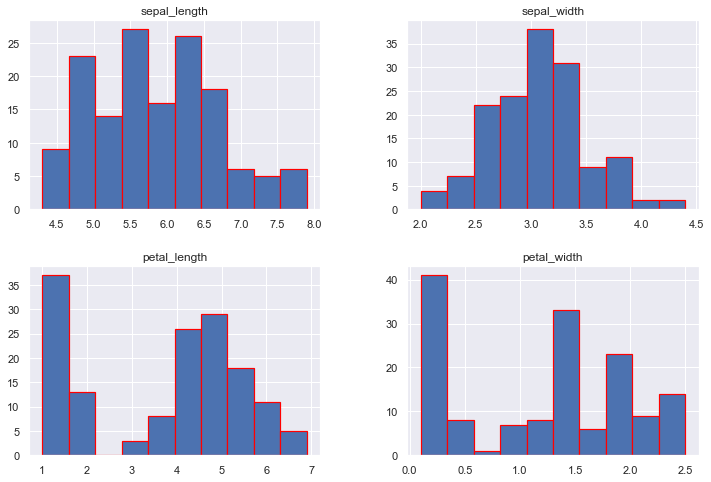

In [43]:
iris.hist(edgecolor='red',figsize=(12,8),linewidth=1.2)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='petal_width'>

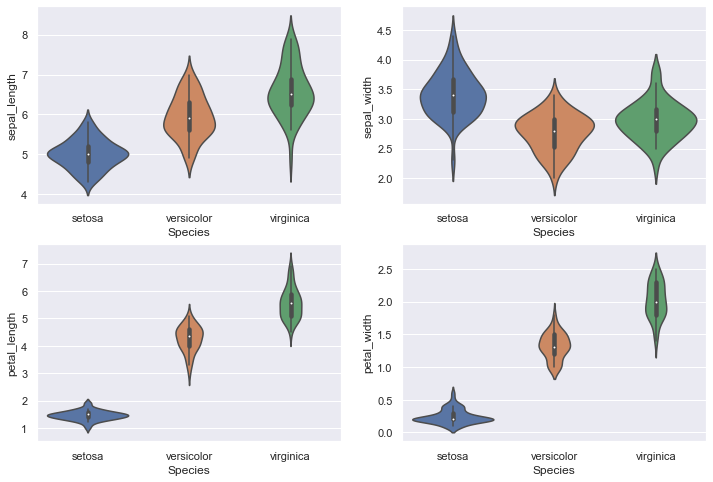

In [46]:
plt.figure(figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='sepal_length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='sepal_width', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='petal_length', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='petal_width', data=iris)

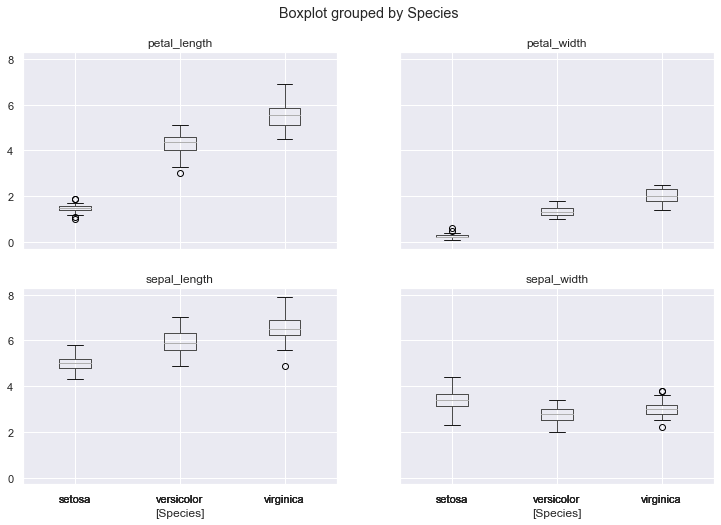

In [47]:
iris.boxplot(by='Species', figsize=(12,8))
plt.show()

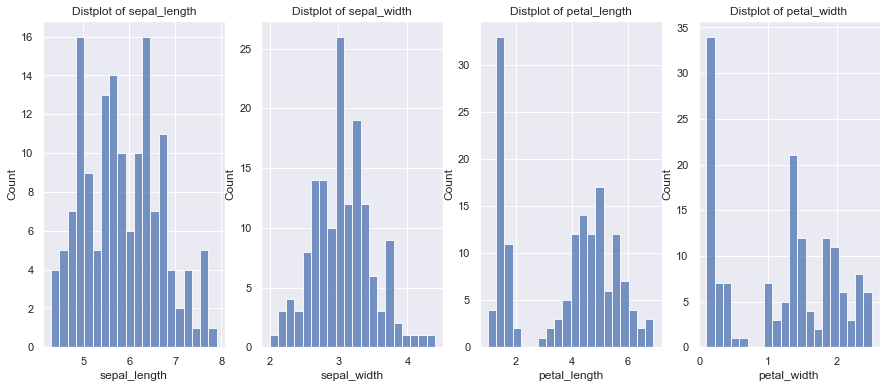

In [19]:
# Distribution of values for each attribute
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']:
    n += 1
    plt.subplot(1 , 4 , n)
    #plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(iris[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

DIVIDING THE DATA FOR TRAINING AND TESTING

In [20]:
#Now let’s plot the average of each feature of each class.

# Separate features and target  
data = iris.values
X = data[:,0:4]
Y = data[:,4]

In [21]:
#Here we separated the features from the target value.
# Calculate average of each features for all classes
colomn_name=["sepal_length","sepal_width","petal_length","petal_width","Species"]
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(colomn_name)-1)
width = 0.25

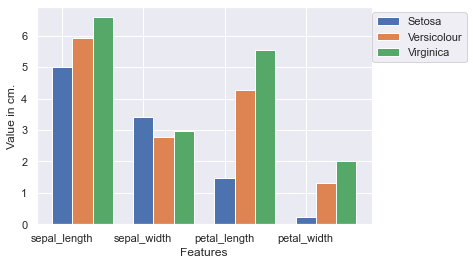

In [22]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, colomn_name[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

Here we can clearly see the verginica is the longest and setosa is the shortest flower.

# Step 3 – Model training:

In [23]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

# Step 4 - Model Evaluation:

In [25]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

The accuracy is above 96%

In [26]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))                 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Step 5 – Testing the model:

In [27]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['setosa' 'versicolor' 'virginica']


Here we take some random values based on the average plot to see if the model can predict accurately.
Output:
Prediction of Species: [‘Iris-setosa’ ‘Iris-versicolor’ ‘Iris-virginica’].
The model is predicting correctly because the setosa is shortest and virginica is the longest and versicolor is in between these two.


In [28]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We can save the model using pickle format.
And again we can load the model in any other program using pickle and use it using model.predict to predict the iris data.
